In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

In [10]:
rawdata = pd.read_csv('./data/parkinson_disease_speech.csv',header=1)
rawdata.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [11]:
data = rawdata.iloc[:,2:-1]
data.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [12]:
label = rawdata['class']
label

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
726    0
727    0
728    0
729    1
730    1
731    1
732    0
733    0
734    0
735    0
736    0
737    0
738    0
739    0
740    0
741    1
742    1
743    1
744    1
745    1
746    1
747    1
748    1
749    1
750    0
751    0
752    0
753    0
754    0
755    0
Name: class, Length: 756, dtype: int64

In [13]:
import numpy as np
from scipy.sparse import diags
from skfeature.utility.construct_W import construct_W


def lap_score(X, **kwargs):
    """
    This function implements the laplacian score feature selection, steps are as follows:
    1. Construct the affinity matrix W if it is not specified
    2. For the r-th feature, we define fr = X(:,r), D = diag(W*ones), ones = [1,...,1]', L = D - W
    3. Let fr_hat = fr - (fr'*D*ones)*ones/(ones'*D*ones)
    4. Laplacian score for the r-th feature is score = (fr_hat'*L*fr_hat)/(fr_hat'*D*fr_hat)

    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    kwargs: {dictionary}
        W: {sparse matrix}, shape (n_samples, n_samples)
            input affinity matrix

    Output
    ------
    score: {numpy array}, shape (n_features,)
        laplacian score for each feature

    Reference
    ---------
    He, Xiaofei et al. "Laplacian Score for Feature Selection." NIPS 2005.
    """

    # if 'W' is not specified, use the default W
    if 'W' not in kwargs.keys():
        W = construct_W(X)
    # construct the affinity matrix W
    W = kwargs['W']
    # build the diagonal D matrix from affinity matrix W
    D = np.array(W.sum(axis=1))
    L = W
    tmp = np.dot(np.transpose(D), X)
    D = diags(np.transpose(D), [0])
    Xt = np.transpose(X)
    t1 = np.transpose(np.dot(Xt, D.todense()))
    t2 = np.transpose(np.dot(Xt, L.todense()))
    # compute the numerator of Lr
    D_prime = np.array(np.sum(np.multiply(t1, X), 0)) - np.multiply(tmp, tmp)/D.sum()
    # compute the denominator of Lr
    L_prime = np.array(np.sum(np.multiply(t2, X), 0)) - np.multiply(tmp, tmp)/D.sum()
    # avoid the denominator of Lr to be 0
    D_prime[D_prime < 1e-12] = 10000

    # compute laplacian score for all features
    score = 1 - np.array(np.multiply(L_prime, 1/D_prime))[0, :]
    return np.transpose(score)


def feature_ranking(score):
    """
    Rank features in ascending order according to their laplacian scores, the smaller the laplacian score is, the more
    important the feature is
    """
    idx = np.argsort(score, 0)
    return idx



In [14]:
data_scaled = (data-data.min())/(data.max()-data.min())
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
W = construct_W(data_scaled, **kwargs_W)
score = pd.Series(lap_score(data_scaled,W=W),index=data.columns)
score

PPE                           0.131453
DFA                           0.072777
RPDE                          0.094006
numPulses                     0.037126
numPeriodsPulses              0.037204
meanPeriodPulses              0.059586
stdDevPeriodPulses            0.177133
locPctJitter                  0.062519
locAbsJitter                  0.062797
rapJitter                     0.051840
ppq5Jitter                    0.047089
ddpJitter                     0.051852
locShimmer                    0.106539
locDbShimmer                  0.108772
apq3Shimmer                   0.120668
apq5Shimmer                   0.105978
apq11Shimmer                  0.126318
ddaShimmer                    0.120668
meanAutoCorrHarmonicity       0.047373
meanNoiseToHarmHarmonicity    0.039930
meanHarmToNoiseHarmonicity    0.084059
minIntensity                  0.033735
maxIntensity                  0.048149
meanIntensity                 0.038274
f1                            0.088434
f2                       

In [15]:
def tdaSelection(data,lens,r,is_min_best=True):
    data_scaled = StandardScaler().fit_transform(data)
    clusters = {}
    bins = np.histogram(lens,bins=r)[1]
    bins[-1] = np.inf
    for i,f in zip(np.digitize(lens,bins),lens.index):
        if (i-1 not in clusters.keys()):
            clusters[i-1] = [f]
        else:
            clusters[i-1].append(f)
    dist = pd.DataFrame(np.arccos(abs(np.corrcoef(data_scaled.T))),index=data.columns,columns=data.columns)
    distmat = pd.DataFrame(np.zeros((len(clusters.keys()),len(clusters.keys()))),index=clusters.keys(),columns=clusters.keys())
    for i in np.arange(len(distmat)):
        for j in np.arange(i):
            distmat.iloc[i,j] = dist.loc[clusters[distmat.index[i]],clusters[distmat.index[j]]].min().min()
    distmat += distmat.T
            
    initial_cluster = max(clusters.keys()) if (is_min_best==True) else 0
    initial_feature = lens[clusters[initial_cluster]].idxmin() if (is_min_best==True) else lens[clusters[initial_cluster]].idxmax()
    
    used_clusters = [initial_cluster]
    selected_features = [initial_feature]
    
    for k in clusters.keys():
        if k==initial_cluster:
            continue
        else:
            new_cluster = distmat[used_clusters].min(axis=1).idxmax()
        used_clusters += [new_cluster]
        new_feature = lens[clusters[new_cluster]].idxmin() if (is_min_best==True) else lens[clusters[new_cluster]].idxmax()
        selected_features.append(new_feature)
        
    return selected_features,clusters,used_clusters

In [16]:
len(data.T)

752

In [19]:
print('hi')

hi


In [17]:
def tdaSelection2(data,lens,r,scroe,is_min_best=True, group_bin_num = 10):
    '''
    group bin method
        data : 
        lens : 
        r : 원하는 cluster 갯수
        is_min_best : 
        
    '''
    data_scaled = StandardScaler().fit_transform(data)
    clusters = {}
    score_ = score.sort_values()
    
    
    len_feature = len(data.T)
    iter_num = int(len_feature / group_bin_num)
    temp_cnt = 0
    group_bin_output = {}
    for i in range(iter_num):
        temp_add_list = 
        group_bin_output{str(i) :}
        # iter len_feature / group_bin_num
        
        
        
            
            
    dist = pd.DataFrame(np.arccos(abs(np.corrcoef(data_scaled.T))),index=data.columns,columns=data.columns)
    distmat = pd.DataFrame(np.zeros((len(clusters.keys()),len(clusters.keys()))),index=clusters.keys(),columns=clusters.keys())
    for i in np.arange(len(distmat)):
        for j in np.arange(i):
            distmat.iloc[i,j] = dist.loc[clusters[distmat.index[i]],clusters[distmat.index[j]]].min().min()
    distmat += distmat.T
            
    initial_cluster = max(clusters.keys()) if (is_min_best==True) else 0
    initial_feature = lens[clusters[initial_cluster]].idxmin() if (is_min_best==True) else lens[clusters[initial_cluster]].idxmax()
    
    used_clusters = [initial_cluster]
    selected_features = [initial_feature]
    
    for k in clusters.keys():
        if k==initial_cluster:
            continue
        else:
            new_cluster = distmat[used_clusters].min(axis=1).idxmax()
        used_clusters += [new_cluster]
        new_feature = lens[clusters[new_cluster]].idxmin() if (is_min_best==True) else lens[clusters[new_cluster]].idxmax()
        selected_features.append(new_feature)
        
    return selected_features,clusters,used_clusters

SyntaxError: invalid syntax (<ipython-input-17-f0295a700048>, line 8)

In [32]:
selected_features,clusters,used_clusters = tdaSelection(data,score,700)

/Users/jaeminpark/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jaeminpark/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
clusters.keys()

dict_keys([261, 144, 186, 72, 117, 353, 123, 124, 102, 92, 211, 216, 240, 210, 251, 93, 78, 166, 65, 94, 74, 175, 234, 326, 323, 402, 530, 525, 607, 370, 293, 282, 178, 333, 226, 403, 321, 645, 149, 421, 114, 349, 465, 255, 296, 254, 394, 239, 229, 357, 257, 180, 173, 145, 156, 152, 246, 301, 289, 302, 256, 307, 367, 351, 207, 458, 506, 564, 490, 481, 499, 574, 517, 620, 565, 224, 371, 492, 557, 572, 599, 558, 529, 489, 630, 595, 586, 598, 98, 126, 120, 205, 193, 212, 238, 264, 280, 306, 268, 339, 137, 133, 250, 163, 171, 206, 233, 225, 197, 258, 244, 153, 121, 217, 139, 135, 183, 26, 0, 2, 17, 13, 40, 30, 18, 53, 19, 37, 10, 36, 35, 127, 181, 223, 219, 214, 312, 3, 6, 28, 106, 20, 38, 14, 58, 45, 29, 31, 33, 16, 25, 24, 27, 4, 11, 47, 32, 54, 42, 68, 56, 41, 15, 23, 129, 176, 220, 213, 232, 304, 66, 59, 52, 86, 73, 34, 50, 22, 39, 89, 82, 44, 76, 101, 116, 143, 136, 165, 177, 209, 243, 167, 115, 109, 100, 111, 7, 104, 70, 60, 62, 55, 84, 107, 122, 79, 63, 67, 80, 75, 95, 112, 131, 174

(array([ 3.,  0.,  6.,  4.,  2.,  1.,  3.,  1.,  0.,  3.,  3.,  2.,  0.,
         4.,  1.,  2.,  1.,  4.,  2.,  5.,  3.,  0.,  2.,  2.,  4.,  2.,
         4.,  6.,  9., 15., 10.,  4.,  1.,  3.,  3.,  9., 18., 11., 12.,
         1.,  3.,  2.,  1.,  2.,  2.,  2.,  0.,  2.,  2.,  0.,  4.,  3.,
         2.,  4.,  2.,  3.,  1.,  2.,  2.,  2.,  4.,  0.,  2.,  4.,  4.,
         4., 10.,  9.,  5.,  0.,  6.,  3.,  9.,  3.,  6.,  3.,  3.,  5.,
         6.,  4.,  5.,  3.,  3.,  1.,  5.,  4.,  3.,  2.,  4.,  7.,  1.,
         3.,  4.,  6.,  2.,  3.,  3.,  5.,  3.,  5.,  4.,  4.,  4.,  2.,
         3.,  1.,  4.,  1.,  4.,  2.,  4.,  5.,  5.,  0.,  3.,  3.,  3.,
         1.,  3.,  1.,  3.,  3.,  5.,  2.,  6.,  1.,  3.,  1.,  0.,  4.,
         4.,  4.,  0.,  2.,  2.,  1.,  3.,  1.,  1.,  2.,  0.,  1.,  0.,
         2.,  6.,  2.,  0.,  0.,  0.,  2.,  0.,  1.,  4.,  1.,  0.,  0.,
         1.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  1.,  1.,  3.,  1.,  0.,
         2.,  0.,  1.,  0.,  3.,  2.,  1.,  1.,  1.

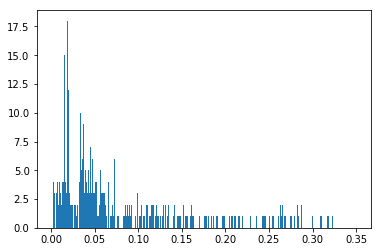

In [34]:
plt.hist(score,bins=700)

In [35]:
dist = np.arccos(abs(np.corrcoef(data.T)))
print(dist.shape)
mds = MDS(dissimilarity='precomputed').fit_transform(dist)
mds

(752, 752)


array([[ 0.13878765,  1.0019906 ],
       [-0.24198329, -0.19787974],
       [-0.30647468,  0.43541337],
       ...,
       [ 0.13788553, -1.05062301],
       [ 1.05399444,  0.01584695],
       [ 0.16468557, -0.80424967]])

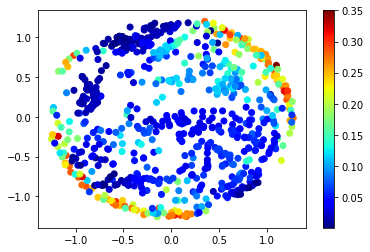

In [36]:
plt.scatter(mds[:,0],mds[:,1],c=score,cmap=plt.cm.jet)
plt.colorbar()

In [37]:
cluster_label = pd.Series(np.zeros(len(data.columns)),index=data.columns)
for k,v in clusters.items():
    cluster_label[v] = k
cluster_label /= cluster_label.max()
cluster_label

PPE                           0.373391
DFA                           0.206009
RPDE                          0.266094
numPulses                     0.103004
numPeriodsPulses              0.103004
meanPeriodPulses              0.167382
stdDevPeriodPulses            0.505007
locPctJitter                  0.175966
locAbsJitter                  0.177396
rapJitter                     0.145923
ppq5Jitter                    0.131617
ddpJitter                     0.145923
locShimmer                    0.301860
locDbShimmer                  0.309013
apq3Shimmer                   0.343348
apq5Shimmer                   0.300429
apq11Shimmer                  0.359084
ddaShimmer                    0.343348
meanAutoCorrHarmonicity       0.133047
meanNoiseToHarmHarmonicity    0.111588
meanHarmToNoiseHarmonicity    0.237482
minIntensity                  0.092990
maxIntensity                  0.134478
meanIntensity                 0.105866
f1                            0.250358
f2                       

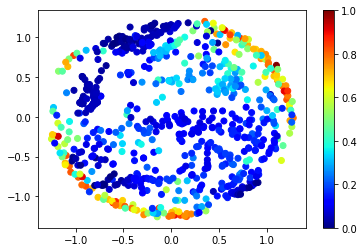

In [38]:
plt.scatter(mds[:,0],mds[:,1],c=cluster_label,cmap=plt.cm.jet)
plt.colorbar()

In [49]:
selected_label = pd.Series(np.zeros(len(data.columns)),index=data.columns)
for i,f in enumerate(selected_features[:20]):
    selected_label[f] = i

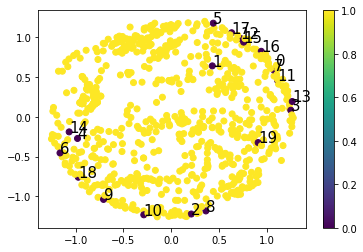

In [50]:
plt.scatter(mds[:,0],mds[:,1],c=selected_label==0)
plt.colorbar()

for i,f in enumerate(selected_features[:20]):
    r = np.where(data.columns==f)[0]
    plt.text(mds[r,0],mds[r,1],i,fontsize=15)